# 1. Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Import The Dataset 

In [2]:
df=pd.read_csv('diabetes-2-1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3. Exploration Of the Data 

In [3]:
#Shape of the dataset
df.shape

(768, 9)

In [4]:
#listof Data type of all columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#Checking if the dataset have any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Statical summary of the data 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the table it can be noticed that few columns like "Gulcose,BloodPressure,Skinthickness,Insulin,BMI" have the minimum values as "ZERO" which is not possible so i am going to replace these ZEROs with the mean of the respective column

#  4. Cleanising of the data

In [7]:
# Dropping the Duplicates 
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
#Checking the shape of the data 
df.shape

(768, 9)

Shape of the data had no effect so there were no duplicates

In [9]:
#Checking the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Checking the number of ZEROs in the columns 

In [11]:
df[df['Glucose']==0].shape[0]

5

In [12]:
df[df['BloodPressure']==0].shape[0]

35

In [13]:
df[df['SkinThickness']==0].shape[0]

227

In [14]:
df[df['Insulin']==0].shape[0]

374

In [15]:
df[df['BMI']==0].shape[0]

11

In [16]:
# Replacing the ZEROs with the mean of the respective columns

In [17]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df[df['Glucose']==0].shape[0]

0

In [18]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [19]:
# Looking at Statical summary of the data 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


So as it is clearly visible we have succesfully replaced all ZEROs with the mean of the columns

# 5. Data Visualisation

<Axes: ylabel='Outcome'>

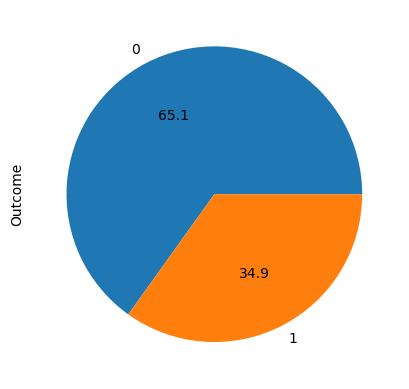

In [20]:
#PieChart
df['Outcome'].value_counts().plot.pie(autopct='%.1f')

This PieChart interprets that this data is "IMBALANCED" Because of the high margin difference between 0 and 1 

0    500
1    268
Name: Outcome, dtype: int64

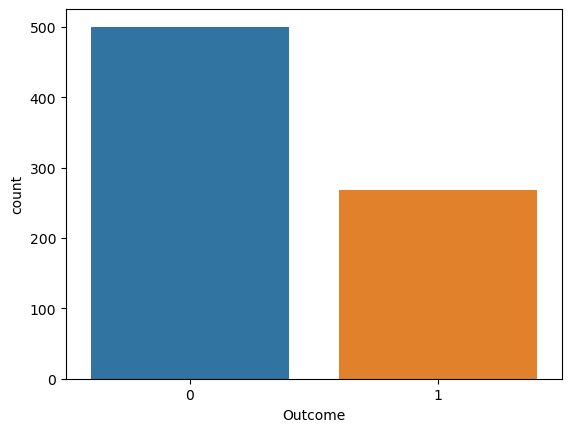

In [21]:
#Countplot
sns.countplot(x='Outcome', data=df)
df['Outcome'].value_counts()

This count Plot is just to see and visualise the count of OUTCOME

<Axes: >

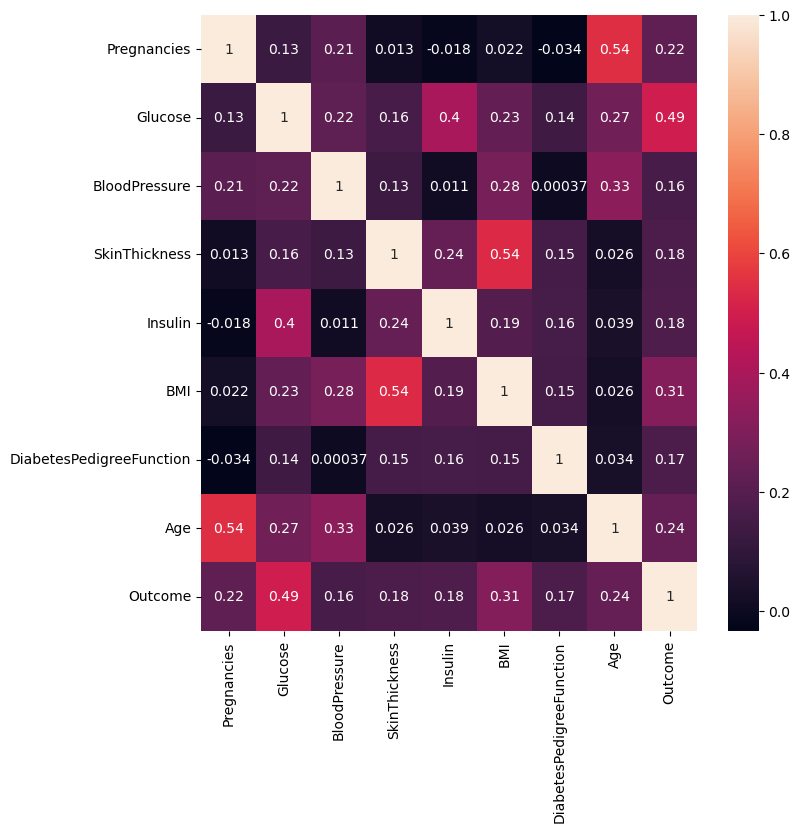

In [31]:
# Heatmap To observe The correlations
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

From the heatmap we can see that Outcome have a strong correlation with [Pregnancies Glucose BloodPressure BMI Age]	

# 6. Splitting the Dataset into X and Y

In [34]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [35]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [38]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 7. Feature Scaling

In [43]:
# Standard Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

# 8.Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(SSX , y , test_size = 0.2 ,random_state = 7)

In [52]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [51]:
X_test.shape,y_test.shape

((154, 8), (154,))

# 9. Applying Classifiers

In [55]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [61]:
#KNN(KneighbourClassifier)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [64]:
# SupportVectorMachine
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [66]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

# 10. Predictions

In [71]:
#LogisticRegression Prediction
lr_pred = lr.predict(X_test)
lr_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [72]:
#KNN Prediction
knn_pred = knn.predict(X_test)
knn_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [73]:
#SVM Prediction
sv_pred = sv.predict(X_test)
sv_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [74]:
#DecisionTree Prediction
dt_pred = dt.predict(X_test)
dt_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [79]:
#RandomForest Prediction
rf_pred = rf.predict(X_test)
rf_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

#  11. Model Evaluation

In [82]:
# Accuracy Score Of Logistic Regression
from sklearn.metrics import accuracy_score
print('Accuracy(TRAIN) score of logistic regression',lr.score(X_train,y_train))
print('Accuracy(TEST) score of logistic regression',accuracy_score(y_test,lr_pred))

Accuracy(TRAIN) score of logistic regression 0.7736156351791531
Accuracy(TEST) score of logistic regression 0.7727272727272727


In [84]:
# Accuracy Score Of KNN
print('Accuracy(TRAIN) score of KNN',knn.score(X_train,y_train))
print('Accuracy(TEST) score of KNN',accuracy_score(y_test,knn_pred))

Accuracy(TRAIN) score of KNN 0.8110749185667753
Accuracy(TEST) score of KNN 0.7467532467532467


In [85]:
#Accuracy score Of SVM
print('Accuracy(TRAIN) score of SVM',sv.score(X_train,y_train))
print('Accuracy(TEST) score of SVM',accuracy_score(y_test,sv_pred))

Accuracy(TRAIN) score of SVM 0.8192182410423453
Accuracy(TEST) score of SVM 0.8311688311688312


In [88]:
# Accuracy Score Of DecisionTree
print('Accuracy(TRAIN) score of DecisionTree',dt.score(X_train,y_train))
print('Accuracy(TEST) score of DecisionTree',accuracy_score(y_test,dt_pred))

Accuracy(TRAIN) score of DecisionTree 1.0
Accuracy(TEST) score of DecisionTree 0.7922077922077922


In [89]:
# Accuracy Score Of RandomForest
print('Accuracy(TRAIN) score of Random Forest',rf.score(X_train,y_train))
print('Accuracy(TEST) score of Random Forest',accuracy_score(y_test,rf_pred))

Accuracy(TRAIN) score of Random Forest 1.0
Accuracy(TEST) score of Random Forest 0.7857142857142857


# 11. Classification Reports  

In [90]:
from sklearn.metrics import classification_report

In [93]:
#Classification Report For LogisticRegression
print( '\n',classification_report(y_test,lr_pred,digits=4))


               precision    recall  f1-score   support

           0     0.7818    0.8866    0.8309        97
           1     0.7500    0.5789    0.6535        57

    accuracy                         0.7727       154
   macro avg     0.7659    0.7328    0.7422       154
weighted avg     0.7700    0.7727    0.7652       154



In [94]:
#Classification Report For KNN
print( '\n',classification_report(y_test,knn_pred,digits=4))


               precision    recall  f1-score   support

           0     0.7736    0.8454    0.8079        97
           1     0.6875    0.5789    0.6286        57

    accuracy                         0.7468       154
   macro avg     0.7305    0.7122    0.7182       154
weighted avg     0.7417    0.7468    0.7415       154



In [95]:
#Classification Report For SVM
print( '\n',classification_report(y_test,sv_pred,digits=4))


               precision    recall  f1-score   support

           0     0.8198    0.9381    0.8750        97
           1     0.8605    0.6491    0.7400        57

    accuracy                         0.8312       154
   macro avg     0.8401    0.7936    0.8075       154
weighted avg     0.8349    0.8312    0.8250       154



In [96]:
#Classification Report For DecisionTree
print( '\n',classification_report(y_test,dt_pred,digits=4))


               precision    recall  f1-score   support

           0     0.8495    0.8144    0.8316        97
           1     0.7049    0.7544    0.7288        57

    accuracy                         0.7922       154
   macro avg     0.7772    0.7844    0.7802       154
weighted avg     0.7960    0.7922    0.7935       154



In [97]:
#Classification Report For RandomForest
print( '\n',classification_report(y_test,rf_pred,digits=4))


               precision    recall  f1-score   support

           0     0.8137    0.8557    0.8342        97
           1     0.7308    0.6667    0.6972        57

    accuracy                         0.7857       154
   macro avg     0.7722    0.7612    0.7657       154
weighted avg     0.7830    0.7857    0.7835       154

